## Week 4 데이터에서 인사이트 발견하기 (2) 실습자료

### 전세계 음주 데이터 분석하기

#### <Step1. 탐색> 데이터의 기초 정보 살펴보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drinks=pd.read_csv('drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [2]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


#### <Step2. 인사이트의 발견> : 탐색과 시각화¶

[피처간의 상관관계 탐색]

- 1) 두 피처간의 상관계수 구하기

In [5]:
beer=np.array(drinks['beer_servings'])
beer

array([  0,  89,  25, 245, 217, 102, 193,  21, 261, 279,  21, 122,  42,
         0, 143, 142, 295, 263,  34,  23, 167,  76, 173, 245,  31, 231,
        25,  88,  37, 144,  57, 147, 240,  17,  15, 130,  79, 159,   1,
        76,   0, 149, 230,  93, 192, 361,   0,  32, 224,  15,  52, 193,
       162,   6,  52,  92,  18, 224,  20,  77, 263, 127, 347,   8,  52,
       346,  31, 133, 199,  53,   9,  28,  93,   1,  69, 234, 233,   9,
         5,   0,   9, 313,  63,  85,  82,  77,   6, 124,  58,  21,   0,
        31,  62, 281,  20,  82,  19,   0, 343, 236,  26,   8,  13,   0,
         5, 149,   0,   0,  98, 238,  62,   0,  77,  31,  12,  47,   5,
       376,  49,   5, 251, 203,  78,   3,  42, 188, 169,  22,   0, 306,
       285,  44, 213, 163,  71, 343, 194,   1, 140, 109, 297, 247,  43,
       194, 171, 120, 105,   0,  56,   0,   9, 283, 157,  25,  60, 196,
       270,  56,   0, 225, 284,  16,   8, 128,  90, 152, 185,   5,   2,
        99, 106,   1,  36,  36, 197,  51,  51,  19,   6,  45, 20

In [6]:
wine=np.array(drinks['wine_servings'])
wine

array([  0,  54,  14, 312,  45,  45, 221,  11, 212, 191,   5,  51,   7,
         0,  36,  42, 212,   8,  13,   0,   8,   8,  35,  16,   1,  94,
         7,   0,   7,  16,   1,   4, 100,   1,   1, 172,   8,   3,   1,
         9,  74,  11, 254,   5, 113, 134,   0,   1, 278,   3,  26,   9,
         3,   1,   2, 233,   0,  59,   0,   1,  97, 370,  59,   1, 149,
       175,  10, 218,  28,   2,   2,  21,   1,   1,   2, 185,  78,   0,
         0,   0,   0, 165,   9, 237,   9,  16,   1,  12,   2,   1,   0,
         6, 123,  62,  31,   0,   2,   0,  56, 271,   4,   1,   0,   0,
         1, 120,   0,   0,  18,   5,  18,   0,   8, 128,  10,   5,   0,
         1,   8,   0, 190, 175,   1,   1,   2,   7, 129,   1,   0,  23,
        18,   1,  74,  21,   1,  56, 339,   7,   9,  18, 167,  73,   0,
        32,  71,  11,  24,   0, 140,   0,   7, 127,  51,   2,  11, 116,
       276,   1,   0,  81, 112,   0,   0,   7,   2, 186, 280,  16,   0,
         1,  86,   4,  19,   5,   7,  20,   7,  32,   9,   0,  4

In [7]:
result=np.corrcoef(beer, wine)
result

array([[1.        , 0.52717169],
       [0.52717169, 1.        ]])

- 2) 여러 피처간의 상관계수 구하기

In [8]:
beer=np.array(drinks['beer_servings'])
spirit=np.array(drinks['spirit_servings'])
wine=np.array(drinks['wine_servings'])
total=np.array(drinks['total_litres_of_pure_alcohol'])
result=np.corrcoef([beer, spirit, wine, total])
result

array([[1.        , 0.45881887, 0.52717169, 0.83583863],
       [0.45881887, 1.        , 0.19479705, 0.65496818],
       [0.52717169, 0.19479705, 1.        , 0.66759834],
       [0.83583863, 0.65496818, 0.66759834, 1.        ]])

- 3) Heapmap을 통한 여러 피처간의 상관계수 시각화

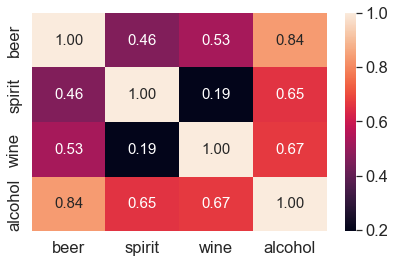

In [9]:
import seaborn as sns

#result행렬에 대한 히트맵을 시각화
cols_view=['beer', 'spirit', 'wine', 'alcohol'] #그래프 출력을 위한 cols 이름을 축약
sns.set(font_scale=1.5)
hm=sns.heatmap(result,
              cbar=True,
              annot=True,
              fmt='.2f',
              annot_kws={'size':15},
              yticklabels=cols_view,
              xticklabels=cols_view)

plt.tight_layout()
plt.show()

- 4) 산점도 행렬을 통한 여러 피처간의 상관계수 시각화

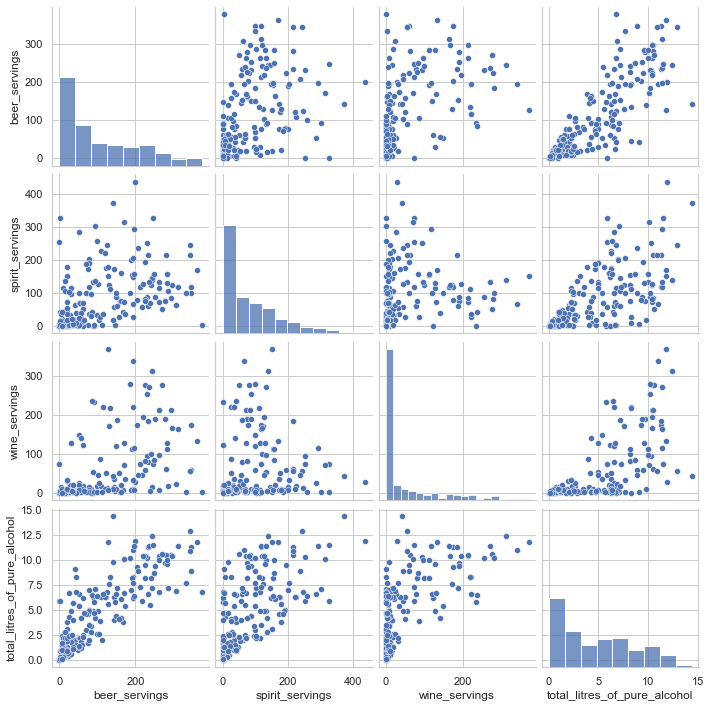

In [10]:
#시각화 라이브러리를 이용한 피쳐간의 scatter plot을 출력
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']], height=2.5)

plt.show()

#### <Step3. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색

[결측 데이터 전처리]

- continent column에 대한 결측 데이터 처리 과정

In [11]:
print(drinks.isnull().sum())
print
('----------------------------------------')
print(drinks.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [12]:
#결측데이터를 처리합니다. 기타 대륙으로 통합-->'OT'
drinks['continent']=drinks['continent'].fillna('OT')

In [13]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [14]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


- continent column에 대한 파이차트 시각화
   * drinks['continent'].value_counts().index.tolist()에는 어떤값을 담고 있나?
   * drinks['continent'].value_counts().values.tolist()에는 어떤값을 담고 있나?

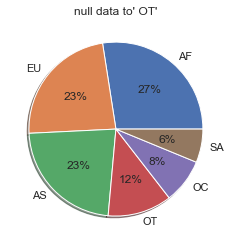

In [15]:
labels=drinks['continent'].value_counts().index.tolist()
fracs1=drinks['continent'].value_counts().values.tolist()

plt.pie(fracs1, labels=labels, autopct='%0.f%%', shadow=True)
plt.title('null data to\' OT\'')
plt.show()

#### [그룹 단위의 데이터 분석 : 대륙별 분석]

##### groupby, agg 함수를 이용한 대륙별 분석

In [16]:
#groupby를 이용하여 대륙별 spirit_servings의 값 group화
result=drinks.groupby('continent').spirit_servings
result.groups

{'AF': [2, 4, 18, 22, 26, 27, 28, 29, 31, 33, 34, 38, 39, 47, 49, 53, 55, 56, 58, 62, 63, 66, 70, 71, 88, 95, 96, 97, 100, 101, 104, 107, 108, 114, 115, 117, 123, 124, 142, 148, 150, 152, 153, 158, 159, 162, 164, 172, 175, 179, 183, 191, 192], 'AS': [0, 12, 13, 19, 24, 30, 36, 46, 77, 78, 79, 80, 82, 85, 86, 87, 90, 91, 92, 94, 102, 103, 112, 116, 119, 127, 128, 134, 137, 138, 141, 149, 154, 161, 167, 168, 169, 171, 176, 177, 181, 186, 189, 190], 'EU': [1, 3, 7, 9, 10, 15, 16, 21, 25, 42, 44, 45, 48, 57, 60, 61, 64, 65, 67, 75, 76, 81, 83, 93, 98, 99, 105, 111, 113, 120, 126, 135, 136, 139, 140, 147, 151, 155, 156, 160, 165, 166, 170, 180, 182], 'OC': [8, 40, 59, 89, 106, 110, 118, 121, 125, 129, 131, 146, 157, 173, 178, 187], 'OT': [5, 11, 14, 17, 32, 41, 43, 50, 51, 54, 68, 69, 73, 74, 84, 109, 122, 130, 143, 144, 145, 174, 184], 'SA': [6, 20, 23, 35, 37, 52, 72, 132, 133, 163, 185, 188]}

In [17]:
result=drinks.groupby('continent').spirit_servings.agg(['mean', 'max', 'min', 'sum'])
result.head()

,mean,max,min,sum
continent,,,,
AF,16.339623,152,0,866
AS,60.840909,326,0,2677
EU,132.555556,373,0,5965
OC,58.437500,254,0,935
OT,165.739130,438,68,3812


- 전체 평균보다 많은 알코올을 섭취하는 대륙 (total_litres_of_pure_alcohol)

In [18]:
total_mean=drinks.total_litres_of_pure_alcohol.mean()
continent_mean=drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean=continent_mean[continent_mean>=total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


- 평균 beer_servings이 가장 높은 대륙

In [19]:
beer_continent=drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


- 대륙별 total_litres_of_pure_alcohol을 시각화

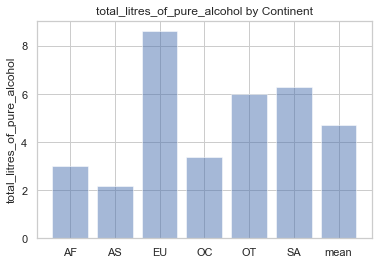

In [20]:
continents=continent_mean.index.tolist()
continents.append('mean')
x_pos=np.arange(len(continents))
alcohol=continent_mean.tolist()
alcohol.append(total_mean)

bar_list=plt.bar(x_pos, alcohol, align='center', alpha=0.5)
plt.xticks(x_pos, continents)
plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')
plt.show()

- 대륙별 beer_servings 시각화

([<matplotlib.axis.XTick at 0x22d2a879340>,
 [Text(0, 0, 'AF'),
  Text(1, 0, 'AS'),
  Text(2, 0, 'EU'),
  Text(3, 0, 'OC'),
  Text(4, 0, 'OT'),
  Text(5, 0, 'SA')])

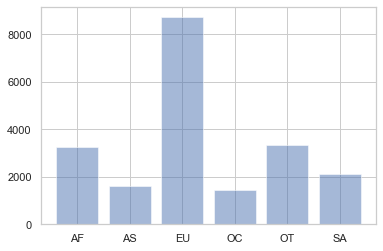

In [21]:
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
plt.xticks(y_pos,continents)

#### <Step4. 실증 분석> 문제에 대한 해답 찾기 (대한민국의 음주 순위는?)


##### 대한민국은 얼마나 술을 독하게 마시는 나라일까? - 대한민국 음주 순위 분석

- 대한민국 정보 분석

In [22]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [23]:
drinks.index[drinks['country']=='South Korea']

Int64Index([138], dtype='int64')

In [24]:
drinks.loc[138]

country                         South Korea
beer_servings                           140
spirit_servings                          16
wine_servings                             9
total_litres_of_pure_alcohol            9.8
continent                                AS
Name: 138, dtype: object

- 술 소비량 대비 순위정보 생성

In [25]:
#total_servings 피처를 생성합니다.
drinks['total_servings']=drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']

#술 소비량 대비 알콜 비율 피처를 생성합니다.
drinks['alcohol_rate']=drinks['total_litres_of_pure_alcohol']/drinks['total_servings']
drinks['alcohol_rate']=drinks['alcohol_rate'].fillna(0)

#순위 정보를 생성합니다.
country_with_rank=drinks[['country', 'alcohol_rate']]
country_with_rank=country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
...,...,...
103,Maldives,0.000000
97,Libya,0.000000
79,Iran,0.000000
90,Kuwait,0.000000


-  국가별 순위 정보를 그래프로 시각화

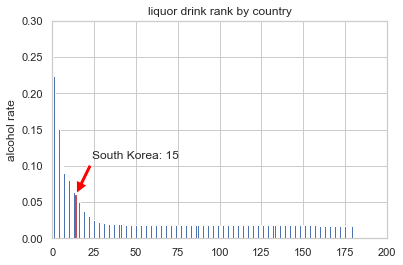

In [29]:
#국가별 순위 정보를 그래프로 시각화합니다.

country_list=country_with_rank.country.tolist()
x_pos=np.arange(len(country_list))
rank=country_with_rank.alcohol_rate.tolist()

bar_list=plt.bar(x_pos, rank)
bar_list[country_list.index('South Korea')].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by country')
plt.axis([0,200,0,0.3])

korea_rank=country_list.index('South Korea')
korea_alc_rate=country_with_rank[country_with_rank['country']=='South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea: '+str(korea_rank+1),
            xy=(korea_rank, korea_alc_rate),
            xytext=(korea_rank+10, korea_alc_rate+0.05),
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()